# Data Wrangling for Hotel Customer Data set

## 1. Import and load the data

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pandas_profiling

In [17]:
# Data Collection
file_name = 'HotelCustomersDataset.tsv'
df = pd.read_csv(file_name, sep = '\t')
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Definition - Understand columns and structures

For column descriptions, check the data source article at https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub

In [19]:
# Basic information about the dataframe
df.info()

# List of columns
print("There are %d columns." % len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

There are total 31 columns.
- 5 categorial columns: Nationality, NameHash, DocIDHash, DistributionChannel, and MarketSegment
- 26 numerical columns (could have either numerical or boolean values)

There are total 83590 rows. 'Age' column has some missing values.
Since NameHash and DocIDHash will not be useful for the project, I will drop them.


In [21]:
# Drop NameHash and DocIDHash
df = df.drop(['NameHash','DocIDHash'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   AverageLeadTime       83590 non-null  int64  
 5   LodgingRevenue        83590 non-null  float64
 6   OtherRevenue          83590 non-null  float64
 7   BookingsCanceled      83590 non-null  int64  
 8   BookingsNoShowed      83590 non-null  int64  
 9   BookingsCheckedIn     83590 non-null  int64  
 10  PersonsNights         83590 non-null  int64  
 11  RoomNights            83590 non-null  int64  
 12  DaysSinceLastStay     83590 non-null  int64  
 13  DaysSinceFirstStay    83590 non-null  int64  
 14  DistributionChannel   83590 non-null  object 
 15  MarketSegment      

In [22]:
# Check summary statistics
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The 'Age' column has missing values and incorrect data (negative values) so we will need to clean it up. We will also explore data quality for numerical columns and boolean columns, separately.

## 3. Explore and clean the data

### 3.1 Missing data

In [23]:
# Number of missing values by columns
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'], ascending = False)

,count,%
Age,3779,4.520876
ID,0,0.000000
Nationality,0,0.000000
DaysSinceCreation,0,0.000000
AverageLeadTime,0,0.000000
LodgingRevenue,0,0.000000
OtherRevenue,0,0.000000
BookingsCanceled,0,0.000000
BookingsNoShowed,0,0.000000
BookingsCheckedIn,0,0.000000


There are 4.5% of customer records with missing age data. Let's quickly check the data for those customers.

In [25]:
# Check customers with missing age data
missing_age = df[df['Age'].isnull()]
missing_age.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,3779.000000,0.0,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,...,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.0,3779.000000,3779.0,3779.000000
mean,30564.220164,NaN,604.807356,53.236306,227.895337,59.834678,0.005822,0.001852,0.829849,3.609950,...,0.000794,0.001323,0.000265,0.009791,0.254035,0.123842,0.0,0.002117,0.0,0.035194
std,23879.422399,NaN,332.874209,81.668457,457.564384,145.264834,0.082753,0.048773,0.799615,3.993015,...,0.028168,0.036355,0.016267,0.098477,0.435375,0.329445,0.0,0.045968,0.0,0.184295
min,2.000000,NaN,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,8717.500000,NaN,288.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,25658.000000,NaN,633.000000,13.000000,144.500000,27.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,49072.500000,NaN,922.000000,76.000000,295.500000,68.500000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000
max,83536.000000,NaN,1095.000000,588.000000,21781.000000,5105.500000,2.000000,2.000000,29.000000,62.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [26]:
missing_age.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,2,PRT,NaN,1095,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20,21,PRT,NaN,1095,63,224.00,156.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
38,39,PRT,NaN,1095,0,0.00,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39,40,PRT,NaN,1095,0,0.00,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,NaN,1095,97,213.52,11.5,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Average DaysSinceCreation of the missing records is 605 days - more than 1.5 years ago. Their data might not be very important to our project. Also, it's only 4.5% of total records. I think it is safe to remove the missing records from the data set.

In [28]:
# Create clean dataframe with non-missing values
clean_df = df[~df['Age'].isnull()]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79811 entries, 0 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    79811 non-null  int64  
 1   Nationality           79811 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     79811 non-null  int64  
 4   AverageLeadTime       79811 non-null  int64  
 5   LodgingRevenue        79811 non-null  float64
 6   OtherRevenue          79811 non-null  float64
 7   BookingsCanceled      79811 non-null  int64  
 8   BookingsNoShowed      79811 non-null  int64  
 9   BookingsCheckedIn     79811 non-null  int64  
 10  PersonsNights         79811 non-null  int64  
 11  RoomNights            79811 non-null  int64  
 12  DaysSinceLastStay     79811 non-null  int64  
 13  DaysSinceFirstStay    79811 non-null  int64  
 14  DistributionChannel   79811 non-null  object 
 15  MarketSegment      

### 3.2 Explore categorical features

In [29]:
# Choose columns with 'object' type
clean_df.select_dtypes(['object'])

,Nationality,DistributionChannel,MarketSegment
0,PRT,Corporate,Corporate
2,DEU,Travel Agent/Operator,Travel Agent/Operator
3,FRA,Travel Agent/Operator,Travel Agent/Operator
4,FRA,Travel Agent/Operator,Travel Agent/Operator
5,JPN,Travel Agent/Operator,Other
...,...,...,...
83585,ITA,Travel Agent/Operator,Other
83586,IRL,Travel Agent/Operator,Other
83587,IRL,Travel Agent/Operator,Other
83588,IRL,Travel Agent/Operator,Other


In [51]:
# What are the nationalities and how many?
clean_df['Nationality'].value_counts()

FRA    12422
DEU    10232
GBR     8656
PRT     7820
ESP     4901
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In terms of nationality, the hotel has French customers the most, followed by German, UK, and Portugal customers. Domestic customers (PRT) take up only 9.8% of the total number of customers. The rest are international customers.

In [31]:
# What are the Distribution Channels?
clean_df['DistributionChannel'].value_counts()

Travel Agent/Operator      65692
Direct                     11308
Corporate                   2318
Electronic Distribution      493
Name: DistributionChannel, dtype: int64

In [32]:
# What are the Market Segments?
clean_df['MarketSegment'].value_counts()

Other                    46204
Travel Agent/Operator    11253
Direct                   10938
Groups                    8861
Corporate                 1914
Complementary              418
Aviation                   223
Name: MarketSegment, dtype: int64

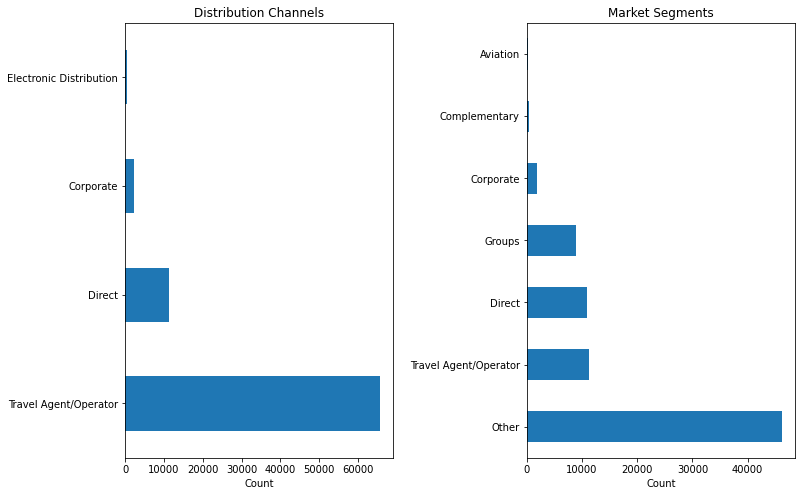

In [33]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
clean_df['DistributionChannel'].value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Distribution Channels')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
clean_df['MarketSegment'].value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Market Segments')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

The hotel's strongest distribution channel (where they acquired customers) is through Travel Agent or Operator.
In terms of Market Segments, however, vast majority of the customers are in the "Other" segment. While this column provides some interesting insights, there is no explanation for "Other" segment. Therefore, I think this column doesn't provide much meaningful information for our clustering purpose.

### 3.3 Explore numerical data

Based on understanding the definition of each column, we know what there are numerical columns and boolean columns.

Numerical columns are:
- ID
- Age
- DaysSinceCreation
- AverageLeadTime (avg. days between booking dates and arrival dates)
- LodgingRevenue
- OtherRevenue
- BookingsCanceled (no. of bookings made then canceled)
- BookingsNoShowed (no. of bookings made then no-show)
- BookingsCheckedIn (no. of bookings made then checked in and stayed)
- PersonsNights (sum of all bookings' persons/nights (no. of persons multiply by no. of nights))
- RoomNights (total room/nights for checked-in bookings. room/nights = no. of rooms * no. of bookings)
- DaysSinceLastStay (data extraction date - last arrival of a booking. -1 = never stayed)
- DaysSinceFirstStay (data extraction date - first arrival of a booking. -1 = never stayed)

In [52]:
# Check Customer ID's duplicates
clean_df['ID'].value_counts()

1        1
56299    1
56306    1
56305    1
56304    1
        ..
28556    1
28555    1
28554    1
28553    1
83590    1
Name: ID, Length: 79811, dtype: int64

There is no duplicate in the customer ID. We now assume that each record represents a unique customer.

In [53]:
# Check and clean 'Age' column
clean_df[clean_df['Age'] < 0]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2053,2054,BIH,-7.0,1034,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,2470,ATF,-7.0,1029,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,5129,FRA,-9.0,981,66,93.30,14.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6751,6752,GBR,-11.0,953,22,450.00,18.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8360,8361,DEU,-7.0,927,256,126.00,109.00,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8628,8629,NLD,-10.0,923,111,414.60,34.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9919,9920,DZA,-6.0,903,54,138.93,29.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10662,10663,DEU,-10.0,891,292,126.00,113.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10694,10695,DEU,-10.0,891,292,128.00,57.50,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10755,10756,PRT,-6.0,891,292,128.00,55.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0


There are 17 rows with negative Ages. Let's drop these records.

In [55]:
# Drop records that have negative age
clean_df = clean_df[clean_df['Age'] > 0]
clean_df['Age'].describe()

count    79752.000000
mean        45.433143
std         16.527807
min          1.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysSinceCreation'}>,
        <AxesSubplot:title={'center':'AverageLeadTime'}>],
       [<AxesSubplot:title={'center':'LodgingRevenue'}>,
        <AxesSubplot:title={'center':'OtherRevenue'}>,
        <AxesSubplot:title={'center':'BookingsCanceled'}>,
        <AxesSubplot:title={'center':'BookingsNoShowed'}>],
       [<AxesSubplot:title={'center':'BookingsCheckedIn'}>,
        <AxesSubplot:title={'center':'PersonsNights'}>,
        <AxesSubplot:title={'center':'RoomNights'}>,
        <AxesSubplot:title={'center':'DaysSinceLastStay'}>],
       [<AxesSubplot:title={'center':'DaysSinceFirstStay'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

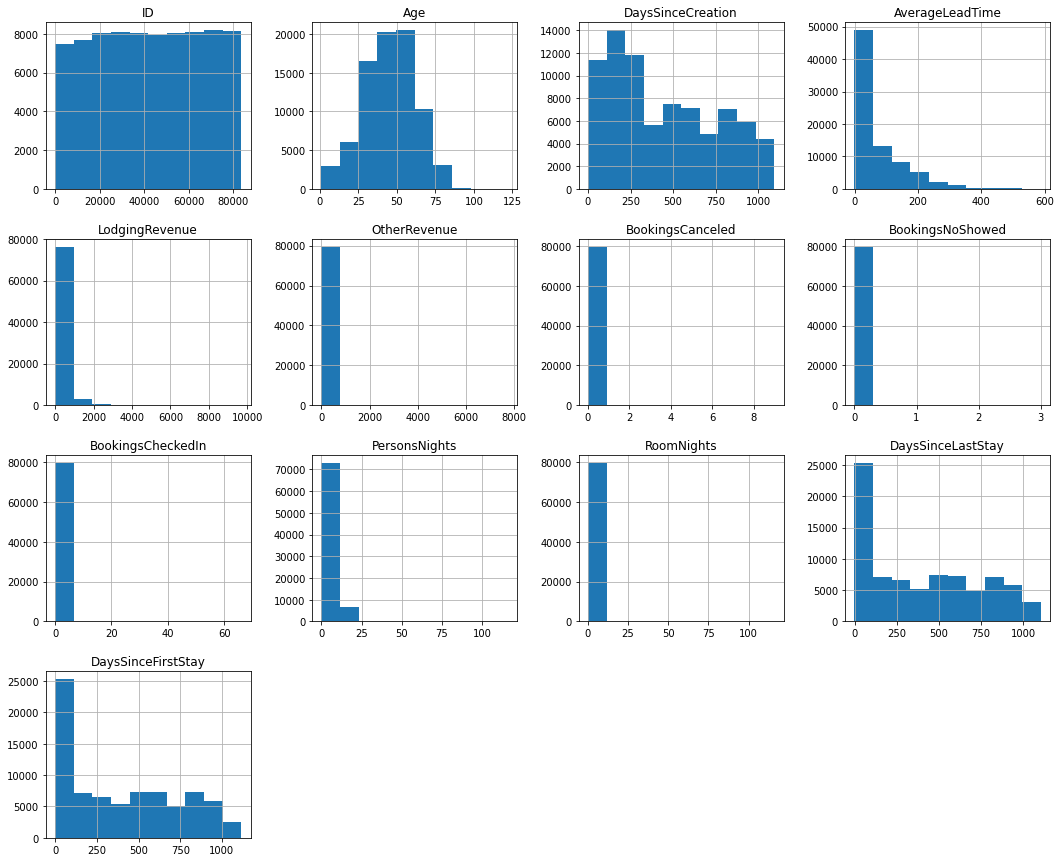

In [75]:
# Create sub dataframe for all numerical columns
numerical_columns = ['ID','Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']
num_df = clean_df[numerical_columns]

# Show histograms for all numerical columns
num_df.hist(figsize= (18,15))